EDA by Siyu Xu
Link to access the blog: https://siyuxu-43687.medium.com/netflix-movies-tv-shows-analysis-c841fe0f351e

In [4]:
from google.colab import drive
drive.mount('/content/netflix_titles')

Mounted at /content/netflix_titles


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
frame = pd.read_csv('/netflix_titles.csv')
frame.set_index("country")


,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,,
Brazil,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...","August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
Mexico,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
Singapore,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...","December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
United States,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...","November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
United States,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...","January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
"Sweden, Czech Republic, United Kingdom, Denmark, Netherlands",s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
India,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...","March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
NaN,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


    Release Year  NumberofMovies
33          2021              12
4           2020             411
3           2019             582
1           2018             734
0           2017             744
..           ...             ...
69          1946               1
56          1945               3
55          1944               3
58          1943               3
62          1942               2

[72 rows x 2 columns]
    Release Year  Number of TV Shows
13          2021                  19
0           2020                 457
1           2019                 414
2           2018                 387
3           2017                 268
4           2016                 240
5           2015                 159
6           2014                  90
7           2013                  65
8           2012                  61
9           2011                  39
10          2010                  37
11          2009                  34
12          2008                  23
14          2007          

Text(0.5, 1.0, 'TV Shows')

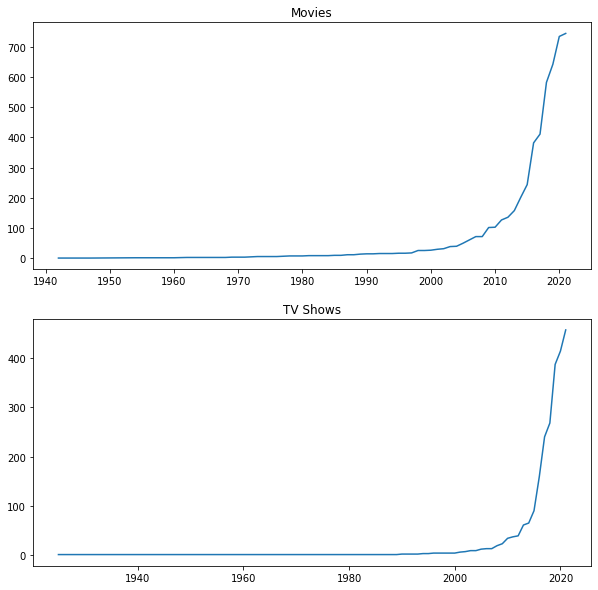

In [8]:
#Release Years
framemovie = frame.loc[frame["type"] == 'Movie']
data = framemovie[["type", "release_year"]]
data2 = data.value_counts('release_year').rename_axis('Release Year').reset_index(name='NumberofMovies')
data5 = data2.sort_values(by=['Release Year'], ascending=False)
print(data5)

frameTV = frame.loc[frame["type"] == 'TV Show']
data3 = frameTV[["type", "release_year"]]
data4 = data3.value_counts('release_year').rename_axis('Release Year').reset_index(name='Number of TV Shows')
data6 = data4.sort_values(by=['Release Year'], ascending=False)
print(data6)

fig = plt.subplots(2,1,figsize=(10,10), sharex = True)
plt.subplot(2,1,1)
plt.plot(data5['Release Year'],data2['NumberofMovies'])
plt.title("Movies")
plt.subplot(2,1,2)
plt.plot(data6['Release Year'],data4['Number of TV Shows'])
plt.title("TV Shows")

([<matplotlib.patches.Wedge at 0x7fcf6fbb7390>,
 [Text(-0.6197480138768643, 0.9087972267209458, 'Movie'),
  Text(0.6197479287891243, -0.9087972847459387, 'TV Show')],
 [Text(-0.3380443712055623, 0.4957075782114249, '69%'),
  Text(0.3380443247940678, -0.49570760986142104, '31%')])

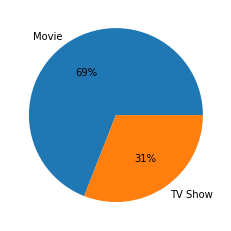

In [9]:
# Percentage of Movies and TV Shows
atype = frame.groupby(by='type').count()
atype.reset_index(inplace=True)
atype[["type", "show_id"]]
plt.pie(atype["show_id"],labels=atype['type'],autopct='%1.0f%%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


               duration
release_year           
1942          35.000000
1943          62.666667
1944          52.000000
1945          51.333333
1946          58.000000
...                 ...
2017          94.836022
2018          96.170300
2019          93.457045
2020          89.795620
2021          80.166667

[72 rows x 1 columns]


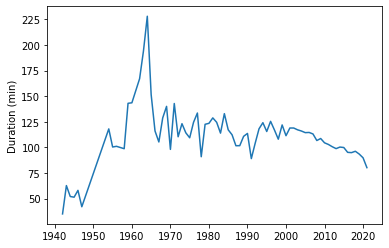

In [15]:
# Movie Duration
movieduration = framemovie[["duration","release_year"]]
movieduration['duration'] = pd.to_numeric(movieduration['duration'].str.replace(' min', ''))

md2 = movieduration.groupby('release_year').mean()
print(md2)
md2.reset_index(inplace=True)
plt.plot(md2['release_year'], md2['duration'])
plt.ylabel("Duration (min)")

movieduration = framemovie[["duration","release_year"]]
movieduration['duration'] = pd.to_numeric(movieduration['duration'].str.replace(' min', ''))


                          country  counts
0                   United States    2555
1                           India     923
2                  United Kingdom     397
3                           Japan     226
4                     South Korea     183
5                          Canada     177
6                           Spain     134
7                          France     115
8                           Egypt     101
9                          Mexico     100
10                         Turkey     100
11                      Australia      83
12                         Taiwan      78
13                         Brazil      72
14                    Philippines      71
15                      Indonesia      70
16                        Nigeria      70
17  United Kingdom, United States      64
18                        Germany      61
19          United States, Canada      60
20                       Thailand      57
21                          China      57
22                      Hong Kong 

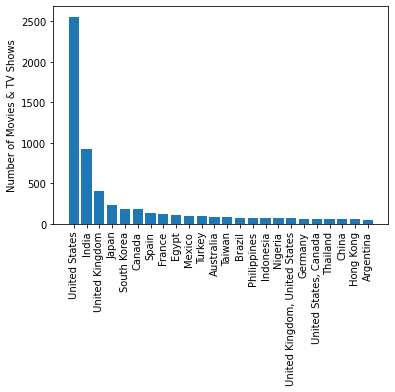

In [16]:
moviebycountry = frame.value_counts('country').rename_axis('country').reset_index(name = 'counts')
movie2 = moviebycountry.loc[moviebycountry['counts'] >= 50]
print(movie2)
plt.bar(movie2['country'],movie2['counts'])
plt.xticks(rotation=90)
plt.ylabel("Number of Movies & TV Shows")
plt.show()

      rating  counts    rating%
0      TV-MA    2863  36.799486
1      TV-14    1931  24.820051
2      TV-PG     806  10.359897
3          R     665   8.547558
4      PG-13     386   4.961440
5       TV-Y     280   3.598972
6      TV-Y7     271   3.483290
7         PG     247   3.174807
8       TV-G     194   2.493573
9         NR      84   1.079692
10         G      39   0.501285
11  TV-Y7-FV       6   0.077121
12        UR       5   0.064267
13     NC-17       3   0.038560


Text(0, 0.5, 'Percentgae of Ratings')

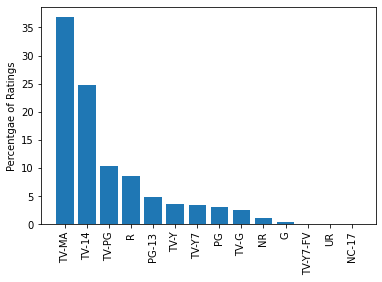

In [ ]:
# Distribution of Ratings for All countries
df = frame.value_counts('rating').rename_axis('rating').reset_index(name='counts')
ratingsum = df.sum()
df['rating%'] = df['counts']/ 7780 * 100
df.set_index('rating')
print(df)
plt.bar(df['rating'], df['rating%'])
plt.xticks(rotation=90)
plt.ylabel("Percentgae of Ratings")

                                               genre  counts     genre%
0                                      Documentaries     334  36.766406
1                                    Stand-Up Comedy     321  24.797740
2                       Dramas, International Movies     320  10.350584
3             Comedies, Dramas, International Movies     243   8.539874
4   Dramas, Independent Movies, International Movies     215   4.956980
5                                           Kids' TV     205   3.595736
6                           Children & Family Movies     177   3.480159
7                Documentaries, International Movies     172   3.171953
8                 Children & Family Movies, Comedies     169   2.491332
9                     Comedies, International Movies     161   1.078721
10     Dramas, International Movies, Romantic Movies     153   0.500835
11   Comedies, International Movies, Romantic Movies     139   0.077051
12  Action & Adventure, Dramas, International Movies     117   0

Text(0, 0.5, 'Percentgae of Genres')

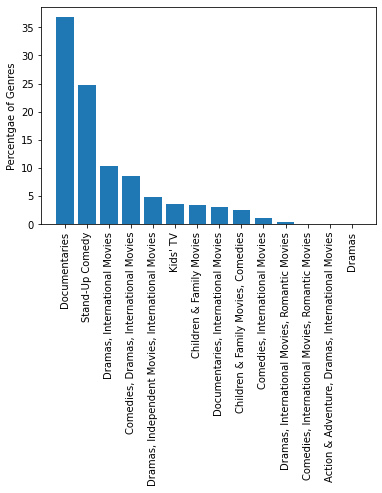

In [ ]:
# Distribution of Genres for All countries
df2 = frame.value_counts('listed_in').rename_axis('genre').reset_index(name='counts')
genresum = df2.sum()
df2['genre%'] = df['counts']/ 7787 * 100
df2drop = df2.dropna() # Dropping too small values
print(df2drop)
plt.bar(df2drop['genre'], df2drop['genre%'])
plt.xticks(rotation=90)
plt.ylabel("Percentgae of Genres")

In [ ]:
# TOP5 Countries Genre Distribution
print('U.S.')
dfUS = frame[frame['country'] == 'United States']
dfUS[["listed_in"]]
dfUS2 = dfUS.value_counts('listed_in').rename_axis('genre').reset_index(name='genre_counts')
dfUS2['genre%'] = dfUS2['genre_counts']/ 2555 * 100  #2555 is shown in block158
dfUS2drop = dfUS2.loc[[0,1,2,3,4],:] # Only select the TOP5 genres
print(dfUS2drop)
print()

print('India')
dfIndia = frame[frame['country'] == 'India']
dfIndia[["listed_in"]]
dfIndia2 = dfIndia.value_counts('listed_in').rename_axis('genre').reset_index(name='genre_counts')
dfIndia2['genre%'] = dfIndia2['genre_counts']/ 923 * 100  # 923 is shown in block158
dfIndia2drop = dfIndia2drop = dfIndia2.loc[[0,1,2,3,4],:] # Only select the TOP5 genres
print(dfIndia2drop)
print()

print('UK')
dfUK = frame[frame['country'] == 'United Kingdom']
dfUK[["listed_in"]]
dfUK2 = dfUK.value_counts('listed_in').rename_axis('genre').reset_index(name='genre_counts')
dfUK2['genre%'] = dfUK2['genre_counts']/ 397 * 100  
dfUK2drop = dfUK2.loc[[0,1,2,3,4],:] # Only select the TOP5 genres
print(dfUK2drop)
print()

print('Japan')
dfJP = frame[frame['country'] == 'Japan']
dfJP[["listed_in"]]
dfJP2 = dfJP.value_counts('listed_in').rename_axis('genre').reset_index(name='genre_counts')
dfJP2['genre%'] = dfJP2['genre_counts']/ 226 * 100  
dfJP2drop = dfJP2drop = dfJP2.loc[[0,1,2,3,4],:] # Only select the TOP5 genres
print(dfJP2drop)
print()

print('South Korea')
dfSK = frame[frame['country'] == 'South Korea']
dfSK[["listed_in"]]
dfSK2 = dfSK.value_counts('listed_in').rename_axis('genre').reset_index(name='genre_counts')
dfSK2['genre%'] = dfSK2['genre_counts']/ 183 * 100  
dfSK2drop = dfSK2.loc[[0,1,2,3,4],:] # Only select the TOP5 genres
print(dfSK2drop)
print()

U.S.
                                genre  genre_counts    genre%
0                       Documentaries           232  9.080235
1                     Stand-Up Comedy           206  8.062622
2  Children & Family Movies, Comedies            81  3.170254
3            Children & Family Movies            78  3.052838
4                              Dramas            78  3.052838

India
                                              genre  genre_counts     genre%
0                      Dramas, International Movies           116  12.567714
1            Comedies, Dramas, International Movies           114  12.351029
2  Dramas, Independent Movies, International Movies            97  10.509209
3     Dramas, International Movies, Romantic Movies            57   6.175515
4  Action & Adventure, Dramas, International Movies            55   5.958830

UK
                                               genre  genre_counts    genre%
0                                      Documentaries            38  9.571

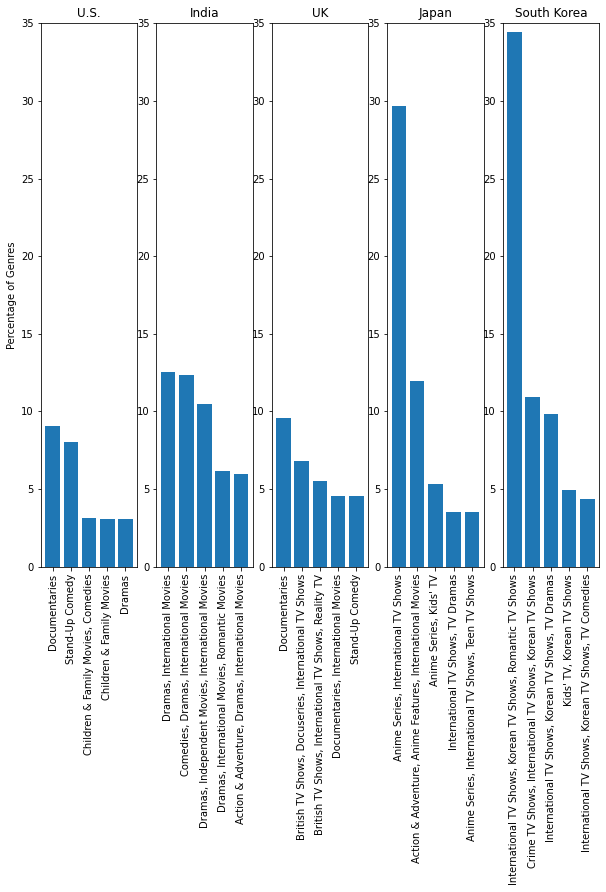

In [347]:
# Plotting the above data

fig = plt.subplots(1,5,figsize=(10,10))


#myAxes[0,1] = plt.bar(dfUS2drop["genre"], dfUS2drop["genre%"])

#ax2.bar(dfIndia2drop["genre"], dfIndia2drop["genre%"])

plt.subplot(1,5,1)
plt.bar(dfUS2drop["genre"], dfUS2drop["genre%"])
plt.ylabel("Percentage of Genres")
plt.xticks(rotation=90)
plt.title("U.S.")
plt.ylim([0, 35])

plt.subplot(1,5,2)
plt.bar(dfIndia2drop["genre"], dfIndia2drop["genre%"])
plt.xticks(rotation=90)
plt.title("India")
plt.ylim([0, 35])

plt.subplot(1,5,3)
plt.bar(dfUK2drop["genre"], dfUK2drop["genre%"])
plt.xticks(rotation=90)
plt.title("UK")
plt.ylim([0, 35])

plt.subplot(1,5,4)
plt.bar(dfJP2drop["genre"], dfJP2drop["genre%"])
plt.xticks(rotation=90)
plt.title("Japan")
plt.ylim([0, 35])

plt.subplot(1,5,5)
plt.bar(dfSK2drop["genre"], dfSK2drop["genre%"])
plt.xticks(rotation=90)
plt.title("South Korea")
plt.ylim([0, 35])
plt.show()
